In [2]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to C:\Users\SAI
[nltk_data]     DEEPTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SAI
[nltk_data]     DEEPTHI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data = pd.read_csv("uci-news-aggregator.csv")
data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [4]:
data.isnull().any()

ID           False
TITLE        False
URL          False
PUBLISHER     True
CATEGORY     False
STORY        False
HOSTNAME     False
TIMESTAMP    False
dtype: bool

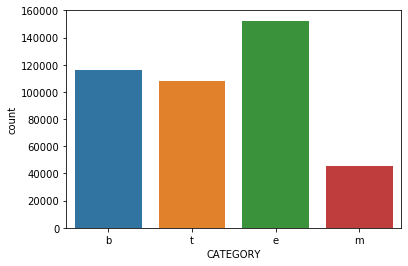

In [6]:
sns.countplot(data.CATEGORY)

In [11]:
data['News_length'] = data['Text'].str.len()
data['News_length']

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64

Text(0.5, 1.0, 'News length distribution')

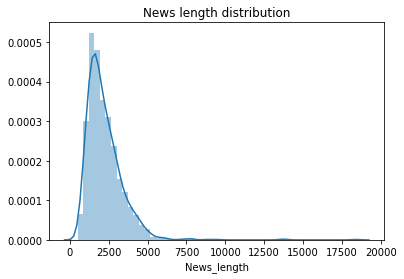

In [7]:
sns.distplot(data['News_length']).set_title('News length distribution')

In [8]:
def create_wordcloud(words):
    wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    
    

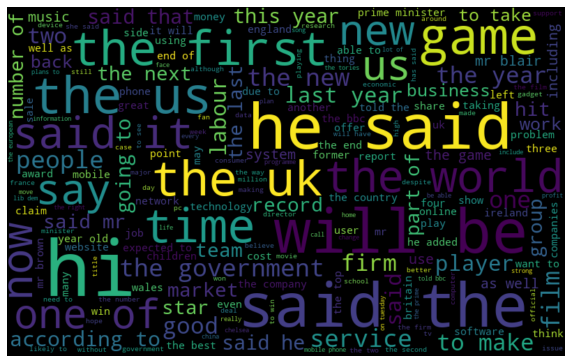

In [9]:
subset = data
text = subset.Text.values
words = ' '.join(text)
create_wordcloud(words)

In [10]:
def process_text(text):
    text = text.lower().replace('\n' ,' ').replace('\r', '').strip()
    text = re.sub(' +', ' ', text) 
    text = re.sub(r'[^\w\s]', '',text)
    
    stop_words = set(stopwords.words('english'))


    word_tokens = word_tokenize(text)
  
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
   

    text = ' '.join(filtered_sentence)
    return text

In [11]:
data['Text_parsed'] = data['Text'].apply(process_text)

In [12]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


In [13]:
label_encoder = preprocessing.LabelEncoder()
data['Category_Target'] = label_encoder.fit_transform(data['Category'])

In [14]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_Target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [15]:
data.to_csv('BBC_News_Processed.csv')

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split (data['Text_parsed'],
                                                     data['Category_Target'],
                                                     test_size = 0.2 ,
                                                    random_state=8)


In [17]:

ngram_range = (1,2)
min_df = 10
max_df = 1.0
max_features = 300

In [18]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = Y_train


features_test = tfidf.transform(X_test).toarray()
labels_test = Y_test






In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
model = RandomForestClassifier(random_state = 1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Random Forest Classifier')
print('Accuracy', accuracy_score(labels_test, model_predictions ))
print(classification_report(labels_test, model_predictions,target_names = label_encoder.classes_))

Random Forest Classifier
Accuracy 0.9194630872483222
               precision    recall  f1-score   support

     business       0.93      0.87      0.90        76
entertainment       0.94      0.94      0.94        47
     politics       0.89      0.85      0.87        55
        sport       0.96      0.98      0.97        65
         tech       0.88      0.96      0.92        55

     accuracy                           0.92       298
    macro avg       0.92      0.92      0.92       298
 weighted avg       0.92      0.92      0.92       298



In [20]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print("Logistic Regression")
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Logistic Regression
Accuracy 0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print("K-Neighbors Classifier")
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))


K-Neighbors Classifier
Accuracy 0.912751677852349
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        76
           1       1.00      0.89      0.94        47
           2       0.84      0.89      0.87        55
           3       0.98      0.95      0.97        65
           4       0.84      0.96      0.90        55

    accuracy                           0.91       298
   macro avg       0.92      0.91      0.91       298
weighted avg       0.92      0.91      0.91       298



In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print("Gaussian Naive Bayesian Classifier")
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))


Gaussian Naive Bayesian Classifier
Accuracy 0.8825503355704698
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        76
           1       0.89      0.89      0.89        47
           2       0.90      0.84      0.87        55
           3       0.95      0.95      0.95        65
           4       0.81      0.91      0.85        55

    accuracy                           0.88       298
   macro avg       0.88      0.88      0.88       298
weighted avg       0.88      0.88      0.88       298



In [23]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print("Multinomial Naive Bayesian Classifier")
print('Accuracy', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))



Multinomial Naive Bayesian Classifier
Accuracy 0.9228187919463087
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        76
           1       0.93      0.91      0.92        47
           2       0.94      0.85      0.90        55
           3       0.95      0.97      0.96        65
           4       0.88      0.95      0.91        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



In [24]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print("Decision Tree Classifier")
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Decision Tree Classifier
Accuracy:  0.7919463087248322
              precision    recall  f1-score   support

           0       0.74      0.75      0.75        76
           1       0.84      0.89      0.87        47
           2       0.78      0.64      0.70        55
           3       0.79      0.92      0.85        65
           4       0.84      0.76      0.80        55

    accuracy                           0.79       298
   macro avg       0.80      0.79      0.79       298
weighted avg       0.79      0.79      0.79       298



# Doc2vec

In [25]:
data_processed = pd.read_csv('BBC_News_Processed.csv')


In [26]:
data = pd.DataFrame()

In [27]:
data['Text'] = data_processed['Text_parsed']

In [28]:
data['Category'] = data_processed['Category_Target']

In [29]:
data.head()

,Text,Category
0,worldcom exboss launches defence lawyers defen...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster better ...,4
4,enron bosses 168m payout eighteen former enron...,0


In [30]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn import utils

In [31]:
def label_sentences(corpus, label_type):
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, Y_train, Y_test = train_test_split(data.Text, data.Category, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [32]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in (all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in (all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [33]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
  vectors = np.zeros((corpus_size, vectors_size))
  for i in range(0, corpus_size):
    prefix = vectors_type + '_' + str(i)
    vectors[i] = model.docvecs[prefix]

  return vectors  



In [34]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [35]:
model = GaussianNB()
model = model.fit(train_vectors_dbow, Y_train)
model_prediction = model.predict(test_vectors_dbow)
print("Gaussian Naive Bayesian Classifier")
print('accuracy %s' % accuracy_score(model_prediction, Y_test))
print(classification_report(Y_test, model_prediction, target_names = label_encoder.classes_))

Gaussian Naive Bayesian Classifier
accuracy 0.9619686800894854
               precision    recall  f1-score   support

     business       0.97      0.97      0.97       103
entertainment       0.93      0.96      0.94        89
     politics       0.97      0.93      0.95        81
        sport       0.99      0.97      0.98        97
         tech       0.94      0.99      0.96        77

     accuracy                           0.96       447
    macro avg       0.96      0.96      0.96       447
 weighted avg       0.96      0.96      0.96       447



In [36]:
model = LogisticRegression()
model = model.fit(train_vectors_dbow, Y_train)
model_prediction = model.predict(test_vectors_dbow)
print("Logistic Regression")
print('accuracy %s' % accuracy_score(model_prediction, Y_test))
print(classification_report(Y_test, model_prediction,target_names = label_encoder.classes_))

Logistic Regression
accuracy 0.9574944071588367
               precision    recall  f1-score   support

     business       0.96      0.96      0.96       103
entertainment       0.93      0.97      0.95        89
     politics       0.95      0.91      0.93        81
        sport       0.98      0.97      0.97        97
         tech       0.96      0.97      0.97        77

     accuracy                           0.96       447
    macro avg       0.96      0.96      0.96       447
 weighted avg       0.96      0.96      0.96       447



In [37]:
model = RandomForestClassifier()
model = model.fit(train_vectors_dbow, Y_train)
model_prediction = model.predict(test_vectors_dbow)
print("Random Forest Classifier")
print('accuracy %s' % accuracy_score(model_prediction, Y_test))
print(classification_report(Y_test, model_prediction,target_names = label_encoder.classes_))

Random Forest Classifier
accuracy 0.8322147651006712
               precision    recall  f1-score   support

     business       0.80      0.91      0.85       103
entertainment       0.92      0.81      0.86        89
     politics       0.80      0.73      0.76        81
        sport       0.80      0.96      0.87        97
         tech       0.89      0.70      0.78        77

     accuracy                           0.83       447
    macro avg       0.84      0.82      0.83       447
 weighted avg       0.84      0.83      0.83       447



In [38]:
model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, Y_train)
model_prediction = model.predict(test_vectors_dbow)
print("Decision Tree Classifier")
print('accuracy %s' % accuracy_score(model_prediction, Y_test))
print(classification_report(Y_test, model_prediction,target_names = label_encoder.classes_))

Decision Tree Classifier
accuracy 0.45861297539149887
               precision    recall  f1-score   support

     business       0.51      0.48      0.49       103
entertainment       0.38      0.34      0.36        89
     politics       0.41      0.46      0.43        81
        sport       0.52      0.51      0.51        97
         tech       0.45      0.52      0.48        77

     accuracy                           0.46       447
    macro avg       0.46      0.46      0.46       447
 weighted avg       0.46      0.46      0.46       447



In [39]:
model = KNeighborsClassifier()
model = model.fit(train_vectors_dbow, Y_train)
model_prediction = model.predict(test_vectors_dbow)
print("K-Neighbors Classifier")
print('accuracy %s' % accuracy_score(model_prediction, Y_test))
print(classification_report(Y_test, model_prediction,target_names = label_encoder.classes_))

K-Neighbors Classifier
accuracy 0.8299776286353467
               precision    recall  f1-score   support

     business       0.92      0.70      0.80       103
entertainment       0.97      0.76      0.86        89
     politics       0.82      0.88      0.85        81
        sport       0.70      1.00      0.83        97
         tech       0.85      0.82      0.83        77

     accuracy                           0.83       447
    macro avg       0.85      0.83      0.83       447
 weighted avg       0.85      0.83      0.83       447

